# Determining confidence interval using z values and t values

In [16]:
%matplotlib inline
import pandas as pd
import numpy as np
import math
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [29]:
pima_indians_diabetes_db = pd.read_csv("diabetes.csv")

In [30]:
pima_indians_diabetes_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
insulin_series = pima_indians_diabetes_db['Insulin']

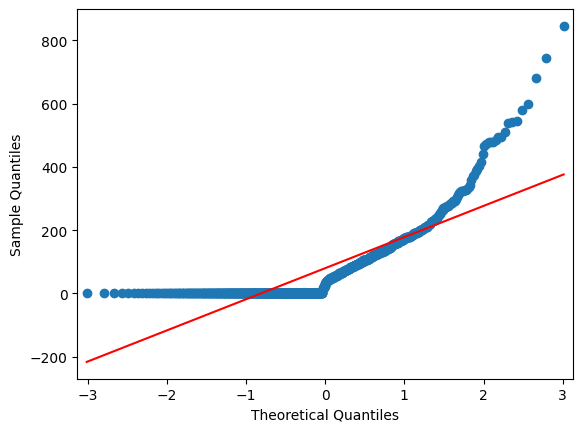

In [10]:
sm.qqplot(insulin_series, line = 'r')
plt.show()

### The Insulin observation values do not follow normal distribution

### Building confidence intervals using Z score values

In [98]:
#as the underlying population distribution is not normal, we shall use a sample size greater than 30
dataset = insulin_series.sample(n = 50, replace = True) # sample size = 50
#mean of sampled data
dataset_mean = dataset.mean()
print(f'sampled dataset mean = {dataset_mean}, population mean = {population_mean}')

#using a confidence of 95%
z_alpha_by_two = abs(stats.norm.ppf(.025))
margin_of_error = z_alpha_by_two * (insulin_series.std()/math.sqrt(len(dataset)))
confidence_interval_z = (dataset_mean - margin_of_error, dataset_mean + margin_of_error)
print(f"Confidence interval using z-values : {confidence_interval_z}")

sampled dataset mean = 115.04, population mean = 120.89453125
Confidence interval using z-values : (83.09657928158343, 146.98342071841657)


### Building confidence intervals using T values

#### T values is more widely used as it is used when the standard deviation of the population is not available. Which is more often the case
#### We shall not use the Insulin data series, as the t-procedure assumes that the distribution of population being sampled is a normal distribution

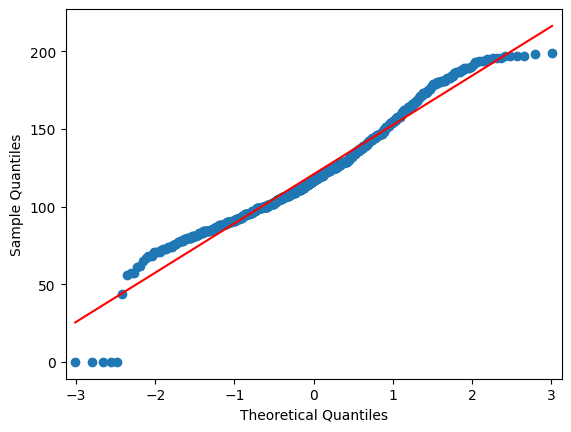

In [35]:
glucose_series = pima_indians_diabetes_db["Glucose"]
sm.qqplot(glucose_series, line = 'r')
plt.show()

#### Glucose series dataset is normally distributed

In [97]:
"""
Build a confidence interval of 95%, for the mean of the population
"""

dataset = glucose_series.sample(n = 50, replace = True)
dataset_mean = dataset.mean()
population_mean = glucose_series.mean()
print(f'sampled dataset mean = {dataset_mean}, population mean = {population_mean}')

sample_std = 0
s = 0
for i in dataset:
    s += (i-dataset_mean)**2
sample_std = math.sqrt(s/(len(dataset) - 1)) # n-1 is used while calculating standard deviation for sample to account for the variance of the data

t_alpha_by_two = abs(stats.t.ppf(q=0.025,df=len(dataset) - 1)) # q = 0.025 because at 95% significance level is 5% and for two tailed value it will be 2.5%

margin_of_error = t_alpha_by_two * sample_std/math.sqrt(len(dataset))
confidence_interval_t = (dataset_mean - margin_of_error, dataset_mean + margin_of_error)
print(f"Confidence interval using t-values : {confidence_interval_t}")

sampled dataset mean = 123.1, population mean = 120.89453125
Confidence interval using t-values : (113.64976230696573, 132.55023769303426)
